In [64]:
from __future__ import print_function
import argparse
import numpy as np
import scipy
from scipy.stats.stats import pearsonr
from scipy.stats import linregress
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
plt.style.use('seaborn-muted')
plt.style.use('seaborn-talk')

SMALL_SIZE = 20
MEDIUM_SIZE = 24
BIGGER_SIZE = 28

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
# import seaborn as sns
# palette = sns.color_palette('muted')
# %matplotlib inline
# %load_ext autoreload
# %autoreload 2

current_palette = sns.color_palette()

In [12]:
real = [0.51190476, 0.36764706, 0.63333333, 0.45238095, 0.43478261, 0.48387097,
 0.57333333, 0.42307692, 0.52631579, 0.44680851, 0.38,      0.45614035,
 0.5,        0.38157895, 0.5,       0.42741935, 0.57251908, 0.51376147,
 0.54794521, 0.53932584]
fake = [0.34309524, 0.35117647, 0.35033333, 0.36642857, 0.35956522, 0.40258065,
 0.5064,     0.37211538, 0.38815789, 0.40191489, 0.3732 ,    0.36105263,
 0.33527273, 0.34789474, 0.44022727, 0.36419355, 0.32114504, 0.34055046,
 0.36164384, 0.34719101]
baseline_std = [0.02868924123008966, 0.0341910974066132, 0.033827996294982274, 0.030657015636062008, 0.039541321020584656, 0.04595613888647258, 0.029872618454587028, 0.03830496978277325, 0.0424940927946188, 0.03646873059832417, 0.03557752099289662, 0.037313607768685364, 0.029127250028364787, 0.03042405740032156, 0.043675999990917334, 0.024638911553455885, 0.02557548120021318, 0.022632118254867307, 0.03476322613821786, 0.029321322136404242]

In [68]:
real = np.array(real)
fake = np.array(fake)
baseline_std = np.array(baseline_std)
z = (real - fake) / baseline_std
p = scipy.stats.norm.sf(abs(z))
stars = []
for one_p in p:
    if one_p <= 1e-3:
        stars.append('***')
    elif one_p <= 1e-2:
        stars.append('**')
    elif one_p <= 5e-2:
        stars.append('*')
    else:
        stars.append('')

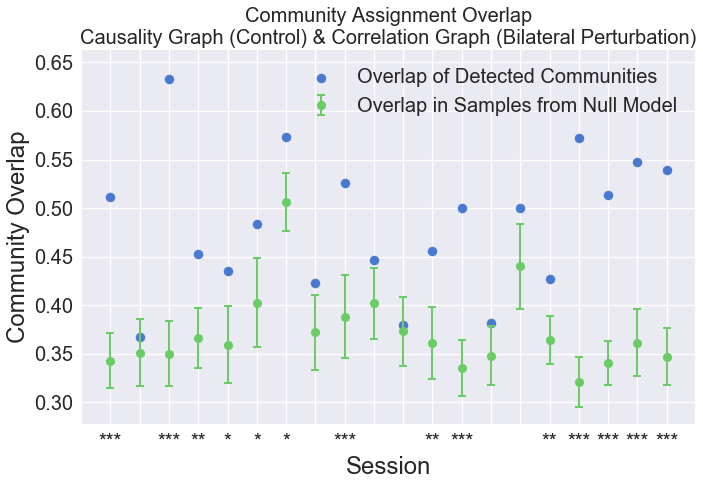

In [70]:
f = plt.figure()
i = 2

x = np.array(range(len(fake)))

# capsize=0,
plt.scatter(x, real, color=current_palette[0], label='Overlap of Detected Communities')
plt.errorbar(x, fake, yerr=baseline_std, fmt='o', elinewidth=2, capthick=2,
             capsize=4, color=current_palette[1], label='Overlap in Samples from Null Model')
# plt.scatter(fake, real)

plt.title('Community Assignment Overlap\nCausality Graph (Control) & Correlation Graph (Bilateral Perturbation)')

plt.xlabel('Session')
plt.ylabel('Community Overlap')
plt.xticks(x, stars)
# plt.plot([np.min([fake, real]), np.max([fake, real])], [np.min([fake, real]), np.max([fake, real])], '--', label='Null Model')

plt.legend()
plt.tight_layout()
f.savefig('community/community-correlation.png')
plt.show()



(array([14.,  0.,  3.,  1.,  0.,  0.,  0.,  1.,  0.,  1.]),
 array([4.23474906e-23, 4.24211119e-02, 8.48422238e-02, 1.27263336e-01,
        1.69684448e-01, 2.12105559e-01, 2.54526671e-01, 2.96947783e-01,
        3.39368895e-01, 3.81790007e-01, 4.24211119e-01]),
 <a list of 10 Patch objects>)

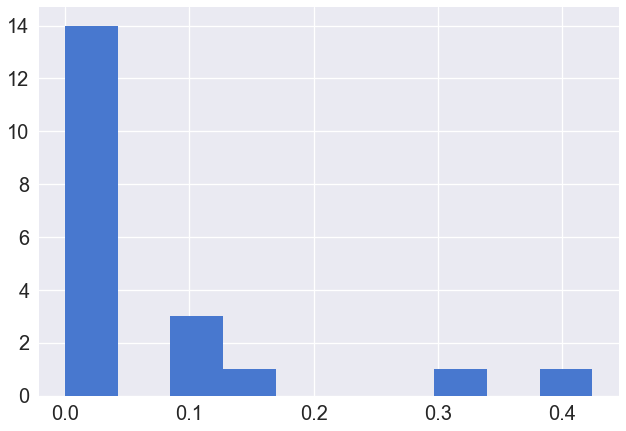

In [66]:
plt.hist(p)